In [1]:
# add modules folder to Python's search path
from os import times
import sys
from pathlib import Path
from os.path import dirname, realpath, abspath
script_dir = Path(abspath(''))#Path(dirname(realpath(__file__)))
module_dir = str(script_dir.parent.parent)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)
print(script_dir)

C:\Users\pinak\Documents\GitHub\NMA
C:\Users\pinak\Documents\GitHub\NMA\experiments\task


In [44]:
# import remaining modules
import task
import methods
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# set up conditions and collect list
db_path = '../../data/hcp_task'
group = task.Group(db_path)
conditions_0 = ['0bk_body', '0bk_faces', '0bk_places', '0bk_tools']
conditions_2 = ['2bk_body', '2bk_faces', '2bk_places', '2bk_tools']
X_0, Y_0 = group.extract_cons(conditions_0, remove_mean=True)
#X_0 = group.squash_frames(X_0)
#X_0, Y_0 = group.transpose(X_0)

Time taken by extract_con is 1.2842905521392822 seconds
Time taken by extract_con is 1.2202246189117432 seconds
Time taken by extract_con is 1.2368805408477783 seconds
Time taken by extract_con is 1.2463085651397705 seconds
Time taken by extract_cons is 5.1273298263549805 seconds


In [45]:
from sklearn.decomposition import PCA
print(X_0.shape)
X_0 = PCA(n_components=10).fit_transform(X_0.reshape(X_0.shape[0], -1))
print(X_0.shape, Y_0.shape)

(1356, 360, 78)
(1356, 10) (1356,)


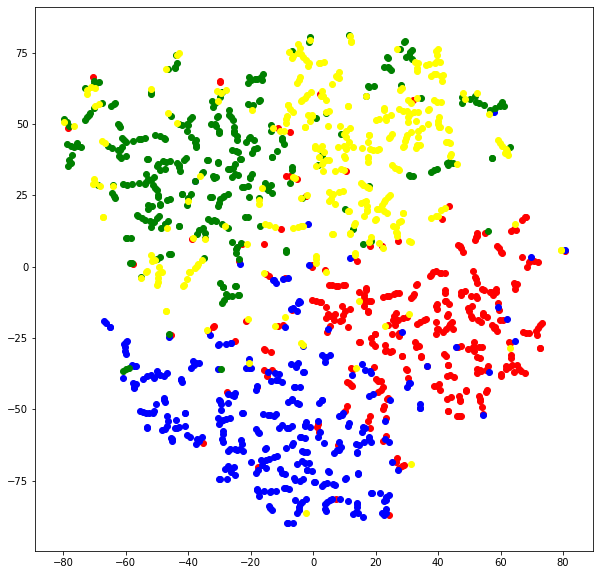

In [46]:
n_subjects = int(X_0.shape[0] / 4)
tsne = TSNE(n_components=2, perplexity=5)
X = tsne.fit_transform(X_0)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
colors = ['red', 'blue', 'green', 'yellow']
for i in range(4):
    idx = list(range(i*n_subjects, (i+1)*n_subjects))
    x = X[idx]
    ax.scatter(x[:, 0], x[:, 1], c=colors[i])
plt.show()

In [47]:
import methods
svm_0 = methods.SVM(kernel='rbf', gamma=1e-9, C=1.0)
svm_0.cross_val(X_0, Y_0)
svm_0.scores

Time taken by massive_shuffle is 0.05385422706604004 seconds
Time taken by cross_val is 0.44983530044555664 seconds


[array([0.87058824, 0.90588235, 0.85882353, 0.87647059, 0.85207101,
        0.89940828, 0.92307692, 0.91715976])]